In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Decision Trees

The decision tree represents observations about an item in branches (splits) and represents a target value in leaf nodes. The splits could be thought of as questions. For example, "is a person male or female?" is a possible way to split the data points. If the target variable is whether or not they survived the sinking of the Titanic, then the leaf nodes represent "yes" or "no", which is the tree's final decision (prediction). If the target variable is categorical, the decision tree is a **classification tree**. If the target variable is numeric, the decision tree is a **regression tree**.

## Classification Trees

### Branching Out

Decision trees usually start out at a root node. The first split is performed by choosing a question to ask. This is the question that best separates the data by some metric. Different metrics can be used but common ones are Gini impurity and information gain. It has been shown in practice that Gini impurity and information gain perform almost equally well, so given that Gini impurity does not require dealing with logarithms, it is a good default metric.

Some decision tree algorithms like CHAID allow for multiple splits. But most decision tree algorithms only allow binary splits. This is because of how quickly the number of possible combinations grows.
### Gini Impurity

Gini impurity measures how often a new data point would be incorrectly labeled if it were to be randomly labeled according to the distribution of the labels in a subset.

$$I_G(p) = 1 - \displaystyle{\sum_{i=1}^J}p_i^2$$

where:
- $p_i$ is the probability of belonging to class $i$
- $J$ is the number of classes

If there is only one class in a subset, then $I_G(p) = 1 - 1^2 = 0$. This means a Gini impurity of $0$ is obtained when there is no mixture of classes in a subset (which would be ideal). When having to choose between possible splits, the split that gives the lowest Gini impurity should be chosen. In this way, the Gini impurity could also be thought of as a measure of the *pureness of the sets of data points produced at a node*.

A split partitions the data set into smaller sets, each of which has its own Gini impurity. The total Gini impurity for the split is calculated by a weighted average of the Gini impurity values. The weights are determined simply by the proportion of the number of data points in each subset.

### Information Gain

Information gain is another way to measure optimal splits. It is based on the concept of entropy.

$$Entropy = -\displaystyle{\sum_{i=1}^J}p_i\log_2p_i$$<br>
$$\text{Information Gain = Entropy of Parent Node}-\text{Weighted Entropy of Child Nodes}$$

where:
- $p_i$ is the probability of belonging to class $i$
- $J$ is the number of classes

Entropy is $0$ when a set is pure because 0 bits are needed to encode this information (i.e. we are fully certain that the elements of this set belong to the same class). Entropy gets higher and higher the more labels are mixed in the set because there is higher uncertainty. But since information gain tells us how much entropy is lost by performing the split, we want to maximize information gain.

Information gain tends to be biased towards features that can take on multiple values (e.g. age vs. gender). To correct this, the information gain ratio can be used instead:

$$\text{Information Gain Ratio} = \displaystyle{\frac{\text{Information Gain}}{\text{Split Information}}}$$<br>
$$\text{Split Information} = -\displaystyle{\sum_{i=1}^A}\frac{|D_i|}{|D|}\log_2\frac{|D_i|}{|D|}$$

where:
- $|D|$ is the total number of data points being considered in the split
- $|D_i|$ is the number of data points that have the attribute $i$
- $A$ is the number of possible values of the attribute on which the split is to be performed (**do not confuse this for the number of classes**)

Split information can be thought of as the total information in the data before the split. This is the same as the entropy of the parent node.

### Example

Sample from the Titanic data set:
<table>
    <thead>
        <tr><th>Gender</th><th>Passenger Class</th><th>Survived</th></tr>
    </thead>
    <tbody>
        <tr><td>M</td><td>3</td><td>0</td></tr>
        <tr><td>F</td><td>1</td><td>1</td></tr>
        <tr><td>F</td><td>3</td><td>1</td></tr>
        <tr><td>F</td><td>1</td><td>0</td></tr>
        <tr><td>M</td><td>3</td><td>0</td></tr>
        <tr><td>M</td><td>3</td><td>0</td></tr>
        <tr><td>M</td><td>1</td><td>0</td></tr>
        <tr><td>M</td><td>3</td><td>1</td></tr>
        <tr><td>F</td><td>3</td><td>1</td></tr>
    </tbody>
</table>

#### Gini Impurity

#### Possible Split 1: Gender

**Male**

$Pr(Survived=1|Gender=Male) = \frac{1}{5}$<br>
$Pr(Survived=0|Gender=Male) = \frac{4}{5}$<br>
$I_GMale = 1 - \displaystyle{\sum_{i=1}^J} p_i^2 = 1 - \left(\frac{1}{5}^2 + \frac{4}{5}^2\right) = 0.32$<br>

**Female**

$Pr(Survived=1|Gender=Female) = \frac{3}{4}$<br>
$Pr(Survived=0|Gender=Female) = \frac{1}{4}$<br>
$I_GFemale = 1 - \displaystyle{\sum_{i=1}^J} p_i^2 = 1 - \left(\frac{3}{4}^2 + \frac{1}{4}^2\right) = 0.375$<br>

$$Weighted\ I_GGender = \displaystyle{\frac{5}{9}}(0.32) + \frac{4}{9}(0.375) = 0.344$$

#### Possible Split 2: Passenger Class

**Passenger Class 3**

$Pr(Survived=1|Passenger\ Class=3) = \frac{3}{6}$<br>
$Pr(Survived=0|Passenger\ Class=3) = \frac{3}{6}$<br>
$I_GMale = 1 - \displaystyle{\sum_{i=1}^J} p_i^2 = 1 - \left(\frac{3}{6}^2 + \frac{3}{6}^2\right) = 0.5$<br>

**Passenger Class 1**

$Pr(Survived=1|Passenger\ Class=1) = \frac{1}{3}$<br>
$Pr(Survived=0|Passenger\ Class=1) = \frac{2}{3}$<br>
$I_GFemale = 1 - \displaystyle{\sum_{i=1}^J} p_i^2 = 1 - \left(\frac{1}{3}^2 + \frac{2}{3}^2\right) = 0.44$<br>

$$Weighted\ I_GPassenger\ Class = \displaystyle{\frac{6}{9}}(0.5) + \frac{3}{9}(0.375) = 0.48$$

Gender is the better predictor, so if we have to choose between these two, we'd want to split on gender.

#### Information Gain

#### Possible Split 1: Gender

**Male**

$Pr(Survived=1|Gender=Male) = \frac{1}{5}$<br>
$Pr(Survived=0|Gender=Male) = \frac{4}{5}$<br>
$\text{Entropy}_{Male} = \displaystyle{-\frac{1}{5}}\log_2\frac{1}{5}-\frac{4}{5}\log_2\frac{4}{5} \approx 0.722$<br>

**Female**

$Pr(Survived=1|Gender=Female) = \frac{3}{4}$<br>
$Pr(Survived=0|Gender=Female) = \frac{1}{4}$<br>
$\text{Entropy}_{Female} = \displaystyle{-\frac{3}{4}}\log_2\frac{3}{4}-\frac{1}{4}\log_2\frac{1}{4} \approx 0.811$<br><br>

$\text{Entropy}_{Parent}\text{(5 dead : 4 alive)} = -\frac{5}{9}\log_2\frac{5}{9} - \frac{4}{9}\log_2\frac{4}{9} \approx 0.991$<br>
$\text{InfoGain}_{Gender} = 0.991 - \frac{5}{9}(0.722) - \frac{4}{9}(0.811) \approx 0.229$<br>
$\text{Split Information (5 male : 4 female)}=-\frac{5}{9}\log_2\frac{5}{9}-\frac{4}{9}\log_2\frac{4}{9} \approx 0.991$<br><br>
$$\text{InfoGainRatio}_{Gender} \approx \displaystyle{\frac{0.229}{0.991}} \approx 0.232$$

#### Possible Split 2: Passenger Class

**Passenger Class 3**

$Pr(Survived=1|Passenger\ Class=3) = \frac{3}{6}$<br>
$Pr(Survived=0|Passenger\ Class=3) = \frac{3}{6}$<br>
$\text{Entropy}_{PassClass1} = \displaystyle{-\frac{3}{6}}\log_2\frac{3}{6}-\frac{3}{6}\log_2\frac{3}{6} = 1$<br>

**Passenger Class 1**

$Pr(Survived=1|Passenger\ Class=1) = \frac{1}{3}$<br>
$Pr(Survived=0|Passenger\ Class=1) = \frac{2}{3}$<br>
$\text{Entropy}_{PassClass3} = \displaystyle{-\frac{1}{3}}\log_2\frac{1}{3}-\frac{2}{3}\log_2\frac{2}{3} \approx 0.918$<br><br>

$\text{Entropy}_{Parent} \approx 0.991$<br>
$\text{InfoGain}_{PassClass} = 0.991 - \frac{6}{9}(1) - \frac{3}{9}(0.918) \approx 0.018$<br>
$\text{Split Information (6 PassClass3 : 3 PassClass1)} = -\frac{6}{9}\log_2\frac{6}{9}-\frac{3}{9}\log_2\frac{3}{9} \approx 0.918$<br><br>

$$\text{InfoGainRatio}_{PassClass} \approx \displaystyle{\frac{0.018}{0.918}} \approx 0.02$$

Gender is again the better predictor by this metric.

### More on Branching Out

The example provided above is simple because the features to split on are binary. But what if they were continuous variables like age? Different packages handle this differently but they evaluate the different values at which a split could be made. For instance, if the ages are 10, 25, 16, 34, and 31, one way to go about this would be to sort the ages then perform the split on age < 16, then evaluate, then do the same for all other potential binary splits on age. Another way to choose split points would be to calculate the averages between adjacent numeric values (e.g. average of 10 and 16, average of 16 and 25, etc.) and use the averages as split points (e.g. age $\leq$ 13, age $\leq$ 20.5, etc.). Then the best split can be chosen.

In the example above, passenger class is technically categorical but the sample only featured two passenger classes. If the example included passenger class 2, then there would have been more possible ways to split:
- 1 vs. 2 or 3
- 2 vs. 1 or 3
- 3 vs. 1 or 2

If there were four categorical values, these are all the possible binary splits:
- 1 vs. 2 or 3 or 4
- 2 vs. 1 or 3 or 4
- 3 vs. 1 or 2 or 4
- 4 vs. 1 or 2 or 3
- 1 or 2 vs. 3 or 4
- 1 or 3 vs. 2 or 4
- 1 or 4 vs. 2 or 3

In general, the number of possible binary splits is $2^{k-1}-1$, where $k$ is the number of levels in the categorical variable.

One nice property of the decision tree is that at each split, it only ever considers one variable once it has found the optimal split point. This means that the scale of the variables is irrelevant because they don't affect each other, so feature scaling is not necessary when working with decision trees.

### Termination

After the first split, the same general procedure is used to split the child nodes further. But branching out will only be productive if performing a split lowers the Gini impurity or improves the information gain. If at one node, all other possible splits raise the Gini impurity or reduce the information gain, no more splits will be performed and that node becomes a leaf node.

## Regression Trees

Regression trees partition the data set into "regions" when they perform splits. The $y$ returned in a region is the average of all the data points in the region. This means the regression tree is essentially a piecewise constant function.

### Visualization of a Regression Tree

Below is a quick visualization of what a very simple regression tree looks like. Given one predictor $X$ and the target values $Y$, the decision tree partitions the data points into three regions.

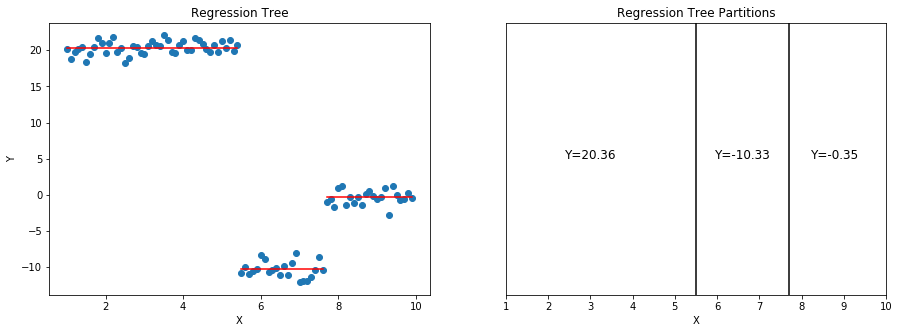

In [2]:
x = np.arange(1,10,.1)
r1_len = int(len(x)/2)
r2_len = int(r1_len/2)
r3_len = len(x)-r1_len-r2_len
y_r1 = 20 + np.random.normal(0,1,r1_len)
y_r2 = -10 + np.random.normal(0,1,r2_len)
y_r3 = np.random.normal(0,1,r3_len)
y = np.concatenate((y_r1,y_r2,y_r3))

fig, axs = plt.subplots(1,2,figsize=(15,5))

axs[0].scatter(x,y)
axs[0].plot(x[:r1_len],np.full(r1_len,y_r1.mean()),color='red')
axs[0].plot(x[r1_len:r1_len+r2_len],np.full(r2_len,y_r2.mean()),color='red')
axs[0].plot(x[-r3_len:],np.full(r3_len,y_r3.mean()),color='red')
axs[0].set_title('Regression Tree')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')

axs[1].set_xlim(1,10)
axs[1].set_ylim(0,1)
axs[1].axvline(x=x[r1_len],color='black')
axs[1].axvline(x=x[r1_len+r2_len],color='black')
axs[1].text(3,.5,'Y={:.2f}'.format(y_r1.mean()),horizontalalignment='center',fontsize=12)
axs[1].text(6.6,.5,'Y={:.2f}'.format(y_r2.mean()),horizontalalignment='center',fontsize=12)
axs[1].text(8.8,.5,'Y={:.2f}'.format(y_r3.mean()),horizontalalignment='center',fontsize=12)
axs[1].set_title('Regression Tree Partitions')
axs[1].set_xlabel('X')
axs[1].set_yticks([])
plt.show()

In the very simple example above, if any new data point whose $X < 5.5$ comes in, the regression tree's prediction $\hat{y}$ is equal to the mean of the data points in the left region.

![Regression Tree Region Partitioning](img/decision_trees/regression_tree_region_partitioning.png)

In this slightly more complicated example, there are two predictors $X_1$ and $X_2$ and the input space is divided into five regions.

![Regression Tree Outputs](img/decision_trees/regression_tree_outputs.png)

Since there are five regions, there are five different possible outputs represented by the different levels.

### Regression Tree Splits

In a regression tree, one way to find the optimal split point is to get the point that minimizes the sum of the squared errors across two regions $R_1$ and $R_2$:

$$\text{minimize}\quad\displaystyle{\sum_{i \in R_1}}(y_i-\hat{y}_{R_1})^2+\sum_{i \in R_2}(y_i-\hat{y}_{R_2})^2$$

where:
- $\hat{y}_{R_1}$ and $\hat{y}_{R_2}$ are the means of the $y$s of all the data points in regions $R_1$ and $R_2$ respectively

The search for the best split starts with all the possible split points across all predictors. The splits are performed until some stopping condition is met.

## Overfitting

Decision trees are known to overfit on the data they are trained on. If left to grow unchecked, the decision tree can grow in such a way that some leaves have single data points because the Gini impurity will always decrease until leaves are pure sets. Tuning some `sklearn` decision tree parameters can help combat this:
- `max_depth` - the maximum depth of the decision tree
- `min_samples_split` - the minimum number of samples required in a node to consider splitting
- `min_samples_leaf` - the minimum number of samples a leaf node can have (a split won't be performed if it results in a leaf node with fewer data points than this)
- `max_features` - the maximum number of features to consider when looking for the best split

Preventing the growth of the tree by naïvely controlling the leaf and tree sizes is one way to go about it. But there exist more complex tree pruning methods and both require splitting the data into train-test sets or cross validation sets:
- **Pre-pruning** methods stop the tree from growing
    - At every stage, evaluate cross-validation error and stop splitting if the error is not significantly reduced
- **Post-pruning** methdos allow the tree to overfit first then cut off branches later.\
    - For each node, remove the node and its children and check test error. Remove nodes if validation error actually decreases. Keep pruning until it worsens the test error.
    - Reduced error pruning
        - start at the leaves and replace the parent node with the most popular class (e.g. if parent node splits into 6 yes - 3 no, just evaluate yes all the time at the parent node, making that a leaf node)
        - the replacement is saved if the test error turns out to be lower after the change

Post-pruning works better in practice because pre-pruning can cut off learning too early.

### Post-pruning Example

![Pruning Example](img/decision_trees/pruning_train.png)

Consider the decision tree above trained on some training set.

![Pruning Example](img/decision_trees/pruning_test.png)

When the test set is used, the errors sum up to $\frac{6}{20}$ for the two leaves at the left. Since the most popular class in the parent of those leaves was N when it was training, we could check if just predicting N for all data points that end up in that node results in a lower error. The error does turn out to be lower at only $\frac{5}{20}$, so we can remove the subtree from that node and make that the leaf.